In [21]:
%matplotlib inline
import os
import cv2 as cv
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# from skimage.io import imread
# from skimage.feature import greycomatrix, greycoprops
# from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [22]:
data_as_frame = pd.read_csv("data.csv")
data_as_frame

,Contrast,Energy,Homogeneity,Correlation,Dissimilarity,ASM,Area,Perimeter,Epsilon,IsConvex,Class
0,0.523178,0.534400,0.879987,0.966634,0.274531,0.285584,0.5,3.414214,0.341421,1.0,0
1,0.523170,0.419387,0.867636,0.966631,0.303373,0.175885,0.0,0.000000,0.000000,0.0,0
2,0.374648,0.511641,0.885670,0.966433,0.250558,0.261776,11.5,15.071068,1.507107,0.0,0
3,0.324349,0.546864,0.899062,0.974246,0.219881,0.299060,4.0,7.656854,0.765685,1.0,0
4,0.332299,0.549499,0.902133,0.972292,0.215157,0.301950,10.0,12.485281,1.248528,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1180,0.859299,0.393714,0.832157,0.961242,0.404434,0.155011,2.0,5.656854,0.565685,1.0,2
1181,0.800144,0.533445,0.882460,0.951564,0.302921,0.284563,10.0,12.485281,1.248528,0.0,2
1182,0.804003,0.529986,0.871638,0.965641,0.321854,0.280885,0.0,0.000000,0.000000,0.0,2
1183,1.564466,0.306192,0.753381,0.877377,0.649148,0.093753,0.0,0.000000,0.000000,0.0,2


In [23]:
data_as_frame['Class'].unique()

array([0, 1, 2], dtype=int64)

In [24]:
data_as_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Contrast       1185 non-null   float64
 1   Energy         1185 non-null   float64
 2   Homogeneity    1185 non-null   float64
 3   Correlation    1185 non-null   float64
 4   Dissimilarity  1185 non-null   float64
 5   ASM            1185 non-null   float64
 6   Area           1185 non-null   float64
 7   Perimeter      1185 non-null   float64
 8   Epsilon        1185 non-null   float64
 9   IsConvex       1185 non-null   float64
 10  Class          1185 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 102.0 KB


In [25]:
def nullAnalysis(df):
    tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})

    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'}))
    return tab_info

In [26]:
nullAnalysis(data_as_frame)

,Contrast,Energy,Homogeneity,Correlation,Dissimilarity,ASM,Area,Perimeter,Epsilon,IsConvex,Class
column type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
cm_plot_labels = ['benign', 'malignant', 'no_tumor']
print(cm_plot_labels)

['benign', 'malignant', 'no_tumor']


In [28]:
X = data_as_frame.drop('Class', axis=1)
Y = data_as_frame['Class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state = 27)

In [29]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1125, 10) (1125,) (60, 10) (60,)


In [30]:
forest = RandomForestClassifier(n_estimators=50) 

In [31]:
forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [32]:
y_pred = forest.predict(x_test)

In [33]:
# y_test

In [34]:
y_pred

array([0, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1,
       0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1,
       2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0], dtype=int64)

In [35]:
def plot_confusion_matrix(cm, classes,title='Confusion matrix'):
    
    plt.imshow(cm, interpolation='nearest', cmap='YlGnBu')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

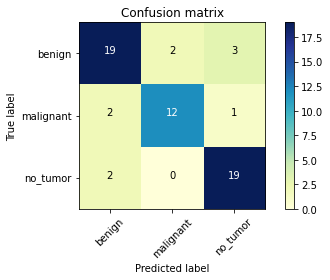

In [36]:
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
plot_confusion_matrix(cm, cm_plot_labels,title='Confusion matrix')

In [37]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.86      0.80      0.83        15
           2       0.83      0.90      0.86        21

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [38]:
rf_acc = accuracy_score(y_true=y_test, y_pred= y_pred)
print("Overall accuracy of training the model is : %f" %(rf_acc*100))

Overall accuracy of training the model is : 83.333333


# Save model

In [39]:
model_fname = 'model/rf_model.pkl'

In [40]:
pkl.dump(forest,open(model_fname,'wb'))

# Done